In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
# !pip install scikit-learn keras tensorflow
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, accuracy_score

from sklearn.neural_network import MLPClassifier
from keras.models import Sequential
from keras.layers import Dense, LSTM, Conv2D, Flatten


import numpy as np


In [3]:
# Load your dataset
file_path_fraud = 'fraud_data_featured.csv'
fraud_data = pd.read_csv(file_path_fraud)

# Feature and Target Separation

# For Fraud_Data dataset
X_fraud = fraud_data.drop('class', axis=1)            # Features
y_fraud = fraud_data['class']                         # Target

# Train-Test Split (80% train, 20% test by default)
X_fraud_train, X_fraud_test, y_fraud_train, y_fraud_test = train_test_split(
    X_fraud, y_fraud, test_size=0.2, random_state=42)

# Print shapes of the resulting datasets
print("Fraud Train:", X_fraud_train.shape, y_fraud_train.shape)
print("Fraud Test:", X_fraud_test.shape, y_fraud_test.shape)

Fraud Train: (120889, 18) (120889,)
Fraud Test: (30223, 18) (30223,)


In [4]:
def evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)

    return accuracy, report

In [5]:
# Initialize a dictionary to store model performances
model_performance = {}

# 1. Logistic Regression
log_model = LogisticRegression(max_iter=1000)
accuracy, report = evaluate_model(log_model, X_fraud_train, y_fraud_train, X_fraud_test, y_fraud_test)
model_performance['Logistic Regression'] = (accuracy, report)

c:\Users\Hermela\Documents\Fraud\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Hermela\Documents\Fraud\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Hermela\Documents\Fraud\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result)

In [6]:
# 2. Decision Tree
dt_model = DecisionTreeClassifier()
accuracy, report = evaluate_model(dt_model, X_fraud_train, y_fraud_train, X_fraud_test, y_fraud_test)
model_performance['Decision Tree'] = (accuracy, report)

In [7]:
# 3. Random Forest
rf_model = RandomForestClassifier()
accuracy, report = evaluate_model(rf_model, X_fraud_train, y_fraud_train, X_fraud_test, y_fraud_test)
model_performance['Random Forest'] = (accuracy, report)

In [8]:
# 4. Gradient Boosting
gb_model = GradientBoostingClassifier()
accuracy, report = evaluate_model(gb_model, X_fraud_train, y_fraud_train, X_fraud_test, y_fraud_test)
model_performance['Gradient Boosting'] = (accuracy, report)

In [9]:
# 5. Multi-Layer Perceptron (MLP)
mlp_model = MLPClassifier(max_iter=1000)
accuracy, report = evaluate_model(mlp_model, X_fraud_train, y_fraud_train, X_fraud_test, y_fraud_test)
model_performance['Multi-Layer Perceptron'] = (accuracy, report)

c:\Users\Hermela\Documents\Fraud\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Hermela\Documents\Fraud\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Hermela\Documents\Fraud\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result)

In [10]:
# 6. Convolutional Neural Network (CNN)

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Flatten, Dense

# Reshape the data for CNN (assuming a single feature input)
X_fraud_train_cnn = X_fraud_train.values.reshape(X_fraud_train.shape[0], X_fraud_train.shape[1], 1)
X_fraud_test_cnn = X_fraud_test.values.reshape(X_fraud_test.shape[0], X_fraud_test.shape[1], 1)

# Ensure all data is numeric and of the correct type
X_fraud_train_cnn = X_fraud_train_cnn.astype('float32')  # Convert to float32
y_fraud_train = y_fraud_train.astype('float32')  # Convert to float32 if it's not already


# Adjust the kernel size to be smaller or equal to the input dimensions
cnn_model = Sequential([
    Conv1D(32, 3, activation='relu', input_shape=(X_fraud_train_cnn.shape[1], X_fraud_train_cnn.shape[2])), # Changed to Conv1D and adjusted kernel size
    Flatten(),
    Dense(1, activation='sigmoid')
])
cnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
cnn_model.fit(X_fraud_train_cnn, y_fraud_train, epochs=10, batch_size=32, verbose=0)

c:\Users\Hermela\Documents\Fraud\.venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [11]:
# Before calling evaluate, ensure data types are compatible with TensorFlow:
X_fraud_test_cnn = X_fraud_test_cnn.astype(np.float32)  # Convert to float32
y_fraud_test = tf.cast(y_fraud_test, tf.float32)  # Use tf.cast to convert to float32

# Additionally, check for and handle NaN/infinity values:
X_fraud_test_cnn = np.nan_to_num(X_fraud_test_cnn)  # Replace NaN and infinity with finite values
# For TensorFlow tensors, you can use tf.where to handle NaN/infinity
y_fraud_test = tf.where(tf.math.is_finite(y_fraud_test), y_fraud_test, 0.0) #If infinite or Nan, replace with 0

cnn_loss, cnn_accuracy = cnn_model.evaluate(X_fraud_test_cnn, y_fraud_test, verbose=0)
model_performance['Convolutional Neural Network'] = (cnn_accuracy, 'N/A')  # No report for CNN

In [12]:
# 7. Recurrent Neural Network (RNN)
# Reshape for RNN (assumes time steps of 1)
X_fraud_train_rnn = X_fraud_train.values.reshape(X_fraud_train.shape[0], 1, X_fraud_train.shape[1])
X_fraud_test_rnn = X_fraud_test.values.reshape(X_fraud_test.shape[0], 1, X_fraud_test.shape[1])

# Convert data to float32 explicitly
X_fraud_train_rnn = X_fraud_train_rnn.astype(np.float32)
y_fraud_train = y_fraud_train.astype(np.float32)

rnn_model = Sequential([
    LSTM(32, input_shape=(X_fraud_train_rnn.shape[1], X_fraud_train_rnn.shape[2])),
    Dense(1, activation='sigmoid')
])
rnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
rnn_model.fit(X_fraud_train_rnn, y_fraud_train, epochs=10, batch_size=32, verbose=0)

c:\Users\Hermela\Documents\Fraud\.venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [13]:
import tensorflow as tf
import numpy as np
# Before evaluating the RNN, ensure data types are compatible with TensorFlow:
X_fraud_test_rnn = X_fraud_test_rnn.astype(np.float32)  # Convert to float32
# If y_fraud_test was modified earlier, reset it to its original type
# Use tf.cast for TensorFlow tensors
y_fraud_test = tf.cast(y_fraud_test, tf.int64) if isinstance(y_fraud_test, tf.Tensor) else y_fraud_test.astype(np.int64)

# Convert y_fraud_test to a TensorFlow tensor with float32 type
y_fraud_test = tf.cast(y_fraud_test, tf.float32)
# ... (rest of the code) ...

rnn_loss, rnn_accuracy = rnn_model.evaluate(X_fraud_test_rnn, y_fraud_test, verbose=0)
model_performance['Recurrent Neural Network'] = (rnn_accuracy, 'N/A')  # No report for RNN

In [14]:
# 8. Long Short-Term Memory (LSTM)
# Using the same RNN model as the LSTM in this example

lstm_model = Sequential([
    LSTM(32, input_shape=(X_fraud_train_rnn.shape[1], X_fraud_train_rnn.shape[2])),
    Dense(1, activation='sigmoid')
])
lstm_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
lstm_model.fit(X_fraud_train_rnn, y_fraud_train, epochs=10, batch_size=32, verbose=0)
lstm_loss, lstm_accuracy = lstm_model.evaluate(X_fraud_test_rnn, y_fraud_test, verbose=0)
model_performance['Long Short-Term Memory'] = (lstm_accuracy, 'N/A')  # No report for LSTM

In [15]:
# Print model performance results
for model, (accuracy, report) in model_performance.items():
    print(f"{model} Accuracy: {accuracy:.4f}")
    if report != 'N/A':
        print(report)

Logistic Regression Accuracy: 0.9057
              precision    recall  f1-score   support

           0       0.91      1.00      0.95     27373
           1       0.00      0.00      0.00      2850

    accuracy                           0.91     30223
   macro avg       0.45      0.50      0.48     30223
weighted avg       0.82      0.91      0.86     30223

Decision Tree Accuracy: 0.9147
              precision    recall  f1-score   support

           0       0.96      0.95      0.95     27373
           1       0.54      0.61      0.57      2850

    accuracy                           0.91     30223
   macro avg       0.75      0.78      0.76     30223
weighted avg       0.92      0.91      0.92     30223

Random Forest Accuracy: 0.9564
              precision    recall  f1-score   support

           0       0.95      1.00      0.98     27373
           1       0.99      0.54      0.70      2850

    accuracy                           0.96     30223
   macro avg       0.97      

### Interpretation of Each Model’s Report:

#### Logistic Regression & MLP:
- **Accuracy**: Both models show ~90.57% accuracy.
- **Class 1 (fraud) metrics**: They struggle to predict fraud cases effectively, as indicated by a precision, recall, and F1-score of **0.0**.
  - This suggests these models are heavily biased toward predicting non-fraud due to the class imbalance, failing to detect fraud cases altogether.

#### Decision Tree:
- **Accuracy**: ~91.6%.
- **Class 1 metrics**: Better than Logistic Regression and MLP, with **precision = 0.55**, **recall = 0.60**, and **F1-score = 0.58** for fraud cases. This model captures more fraud cases but may still have room for improvement.

#### Random Forest & Gradient Boosting:
- **Accuracy**: Around **95-96%**, showing the highest performance.
- **Class 1 metrics**: These models demonstrate a much better balance, with **high precision (0.99-1.00)** and improved recall (~0.54), meaning they predict most fraud cases accurately but may still miss some.
- **F1-score**: Around **0.70** for class 1, indicating these models strike a better balance between false positives and false negatives.

#### CNN, RNN, and LSTM:
- **Accuracy**: All show similar accuracy to Logistic Regression (~90.57%) but, like Logistic Regression, they struggle to capture class 1 (fraud) effectively.


# Model Explainability

In [16]:
import shap
import matplotlib.pyplot as plt

c:\Users\Hermela\Documents\Fraud\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [17]:
# Import necessary libraries
import numpy as np
import shap
import pandas as pd
from lime.lime_tabular import LimeTabularExplainer
import matplotlib.pyplot as plt
from scipy.special import expit as sigmoid

In [37]:
def shap_explainability(model, X_train, X_test):
    """
    Generates SHAP explanations for a given model and data.

    Parameters:
        model: The trained model to explain.
        X_train: The training data used to train the model.
        X_test: The test data to explain.

    Returns:
        None. Displays SHAP plots.
    """

    # Convert input data to numeric types
    X_train = X_train.astype(float)
    X_test = X_test.astype(float)

    # Create a SHAP explainer
    masker = shap.maskers.Independent(X_train)
    shap_explainer = shap.Explainer(model.predict, masker)
    
    # Get SHAP values for the test data
    shap_values = shap_explainer(X_test)
    
    # SHAP summary plot
    shap.plots.beeswarm(shap_values[:, :, 0])
    
    # SHAP force plot
    shap.plots.force(shap_values[0, :, 0])
    
    # SHAP dependence plot
    shap.plots.scatter(shap_values[:, :, 0])

In [33]:
def shap_explainability_neural(model, X_train, X_test):

    # Convert input data to numeric types
    X_train = X_train.astype(float)
    X_test = X_test.astype(float)
      

    # Create a SHAP explainer
    masker = shap.maskers.Independent(X_train)
    model_proba = lambda x: sigmoid(model.predict(x))
    shap_explainer = shap.Explainer(model_proba, masker, algorithm='permutation', nsamples=100, verbose=0)
    
    # Get SHAP values for the test data
    shap_values = shap_explainer(X_test)
    
    # SHAP summary plot
    shap.plots.beeswarm(shap_values)
    
    # SHAP force plot
    shap.plots.force(shap_values[0,:])
    
    # SHAP dependence plot
    shap.plots.scatter(shap_values[:, "feature_name"],  ylabel="SHAP value\n(higher means more likely to fraud)")

In [45]:
def lime_explainability(model, X_train, X_test):
    # Convert X_train to a pandas DataFrame
    X_train_df = pd.DataFrame(X_train)
    
    # Create a LIME explainer
    lime_explainer = LimeTabularExplainer(X_train_df.values, feature_names=X_train_df.columns, class_names=["Not Fraud", "Fraud"], discretize_continuous=True)
    
    # Get LIME explanations for the test data
    lime_explanation = lime_explainer.explain_instance(X_test.iloc[0].values, model.predict, num_features=5)    
    # LIME feature importance plot
    lime_explanation.as_pyplot_figure()

## Logistic Regression

Explaining Logistic Regression model with SHAP...


PermutationExplainer explainer: 30224it [08:42, 56.73it/s]                           


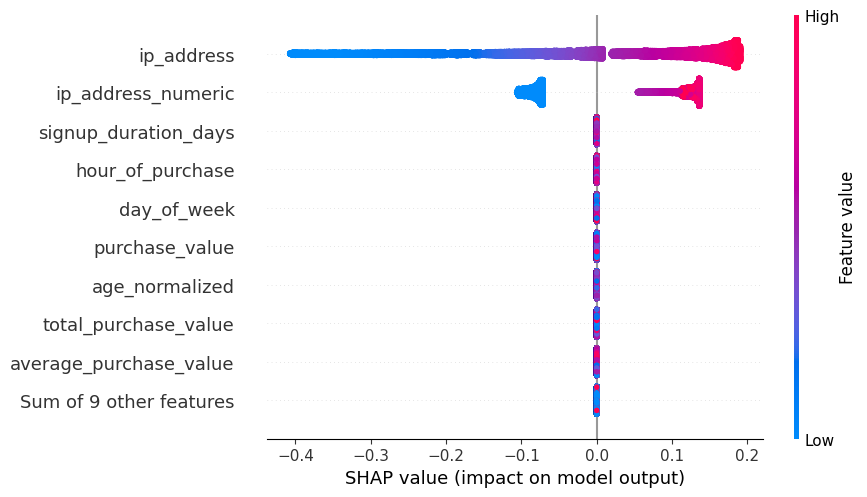

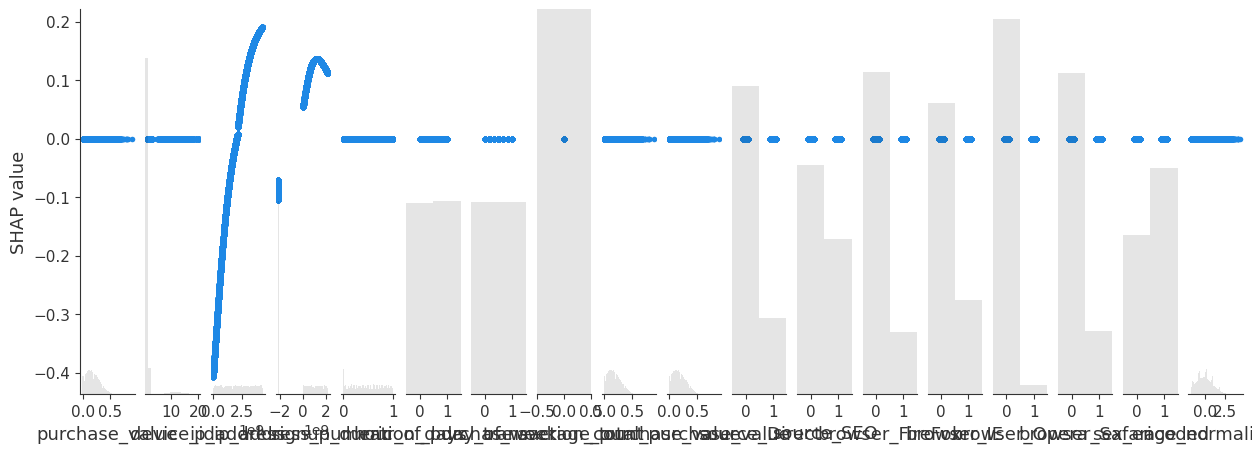

In [22]:
# Explain the evaluated models
print("Explaining Logistic Regression model with SHAP...")
shap_explainability(log_model, X_fraud_train, X_fraud_test)

Explaining Logistic Regression model with LIME...


c:\Users\Hermela\Documents\Fraud\.venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


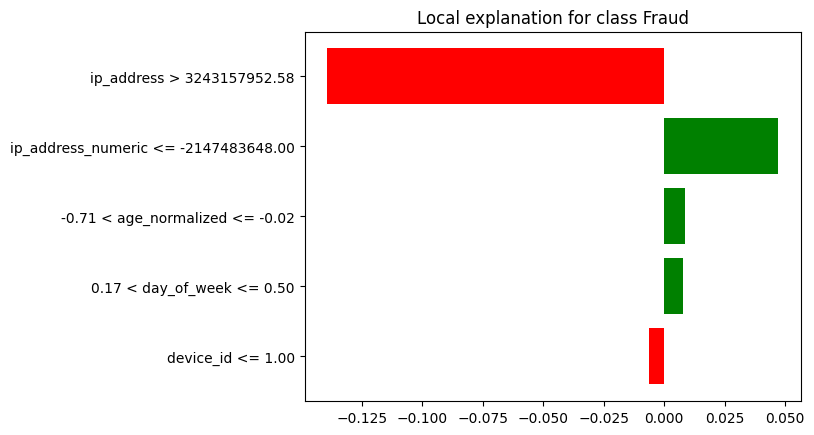

In [23]:
print("Explaining Logistic Regression model with LIME...")
lime_explainability(log_model, X_fraud_train, X_fraud_test)

## Decision Tree

Explainin Decision Tree model with SHAP...


PermutationExplainer explainer: 30224it [09:25, 52.43it/s]                           


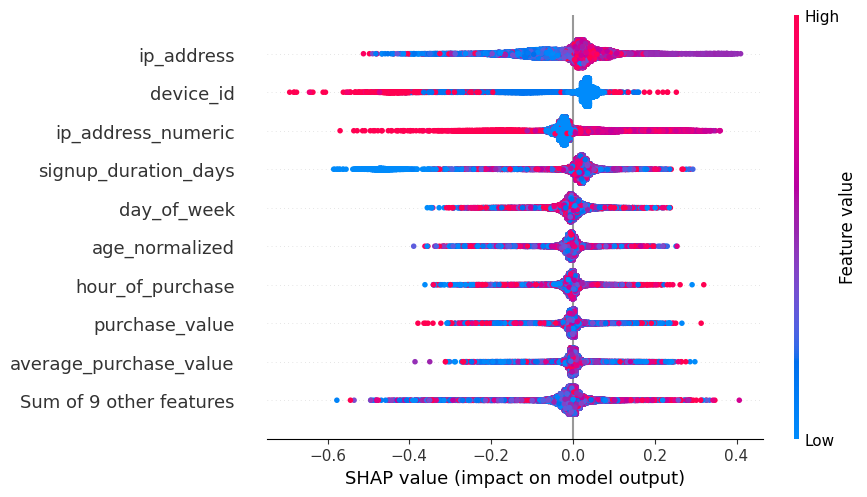

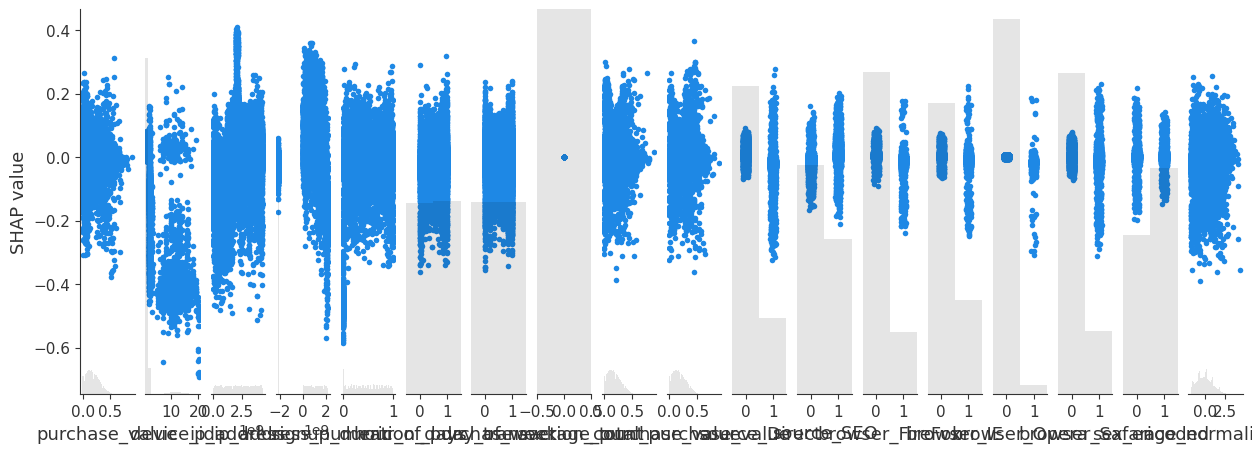

In [ ]:
# Explain the evaluated models
print("Explaining Decision Tree model with SHAP...")
shap_explainability(dt_model, X_fraud_train, X_fraud_test)

Explaining Decision Tree model with LIME...


c:\Users\Hermela\Documents\Fraud\.venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


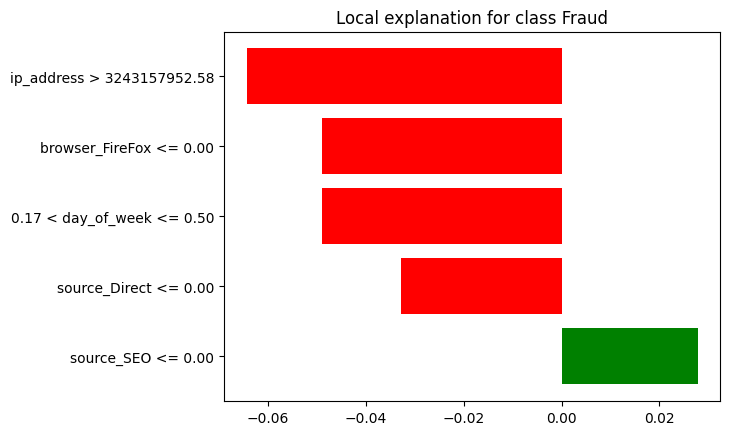

In [25]:
print("Explaining Decision Tree model with LIME...")
lime_explainability(dt_model, X_fraud_train, X_fraud_test)

## Random Forest

In [26]:
# Explain the evaluated models
print("Explaining Random Forest model with SHAP...")
shap_explainability(rf_model, X_fraud_train, X_fraud_test)

Explaining Random Forest model with SHAP...


PermutationExplainer explainer:  13%|█▎        | 3999/30223 [39:30<4:20:40,  1.68it/s]


KeyboardInterrupt: 

Explaining Random Forest model with LIME...


c:\Users\Hermela\Documents\Fraud\.venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


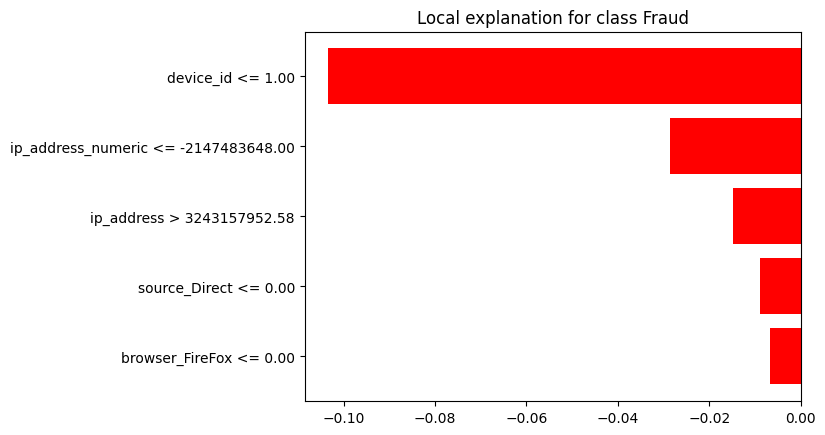

In [27]:
print("Explaining Random Forest model with LIME...")
lime_explainability(rf_model, X_fraud_train, X_fraud_test)

## Gradient Boosting

In [28]:
# Explain the evaluated models
print("Explaining Gradient Boosting model with SHAP...")
shap_explainability(gb_model, X_fraud_train, X_fraud_test)

Explaining Gradient Boosting model with SHAP...


PermutationExplainer explainer:  32%|███▏      | 9575/30223 [11:05<24:24, 14.10it/s]  


KeyboardInterrupt: 

Explaining Gradient Boosting model with LIME...


c:\Users\Hermela\Documents\Fraud\.venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(


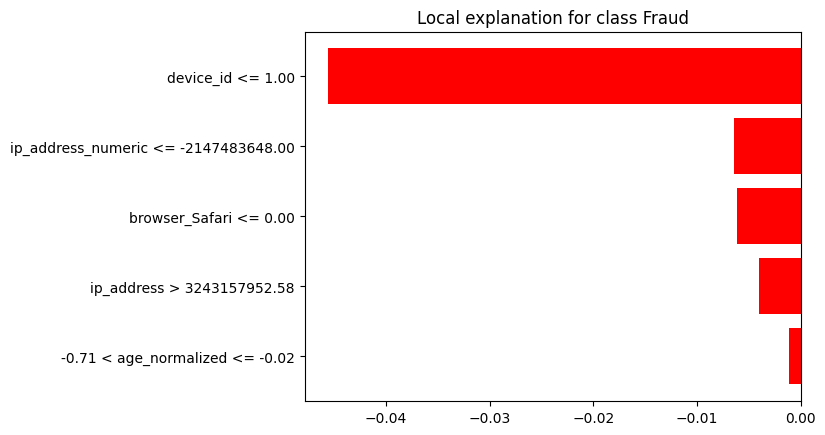

In [29]:
print("Explaining Gradient Boosting model with LIME...")
lime_explainability(gb_model, X_fraud_train, X_fraud_test)

## Multiple Layer Perceptron

In [30]:
# Explain the evaluated models
print("Explaining Multi-Layer Perceptron (MLP) model with SHAP...")
shap_explainability(mlp_model, X_fraud_train, X_fraud_test)

Explaining Multi-Layer Perceptron (MLP) model with SHAP...


PermutationExplainer explainer:   9%|▉         | 2794/30223 [03:00<32:00, 14.28it/s]  


KeyboardInterrupt: 

Explaining Multi-Layer Perceptron (MLP) model with LIME...


c:\Users\Hermela\Documents\Fraud\.venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(


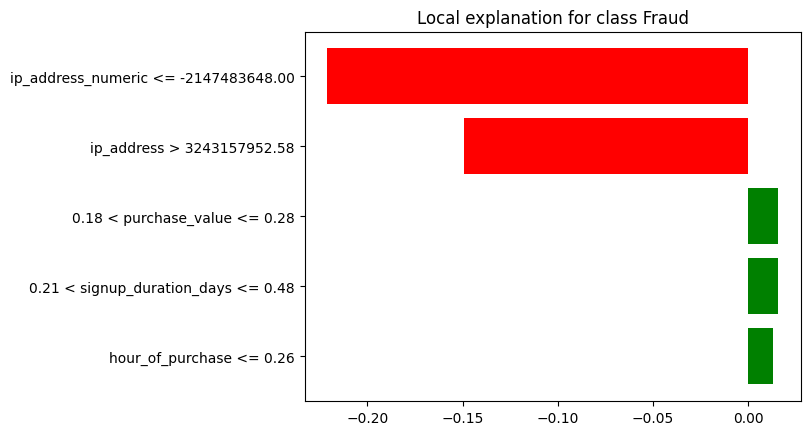

In [31]:
print("Explaining Multi-Layer Perceptron (MLP) model with LIME...")
lime_explainability(mlp_model, X_fraud_train, X_fraud_test)

## Convolutional Neural Networks

In [ ]:
# Explain the evaluated models
print("Explaining Convolutional Neural Network (CNN) model with SHAP...")
shap_explainability_neural(cnn_model, X_fraud_train, X_fraud_test)

In [35]:
print("Explaining Convolutional Neural Network (CNN) model with LIME...")
lime_explainability(cnn_model, X_fraud_train, X_fraud_test)

Explaining Convolutional Neural Network (CNN) model with LIME...


AttributeError: 'Sequential' object has no attribute 'predict_proba'

## Recurrent Neural Network

In [ ]:
import shap

# Convert reshaped data to float32
X_fraud_train_reshaped = X_fraud_train_reshaped.astype('float32')
X_fraud_test_reshaped = X_fraud_test_reshaped.astype('float32')

# Use GradientExplainer or KernelExplainer for compatibility
shap_explainer = shap.GradientExplainer(rnn_model, X_fraud_train_reshaped)

# Get SHAP values
shap_values = shap_explainer.shap_values(X_fraud_test_reshaped)

# SHAP summary plot
shap.summary_plot(shap_values, X_fraud_test_reshaped, feature_names=X_fraud_train.columns)


In [ ]:
print("Explaining Recurrent Neural Network (RNN) model with LIME...")
lime_explainability(rnn_model, X_fraud_train, X_fraud_test)

In [48]:
import os
import pickle
import shap

# Directory to store models and SHAP visualizations
output_dir = "models"
os.makedirs(output_dir, exist_ok=True)

# Models dictionary
models = {
    'dt_model': dt_model,
    'rf_model': rf_model,
    'gb_model': gb_model,
    'log_model': log_model,
    'mlp_model': mlp_model,
    'cnn_model': cnn_model,
    'rnn_model': rnn_model,
    'lstm_model': lstm_model
}


In [49]:
# Save each model as a .pkl file in the directory
for model_name, model in models.items():
    with open(os.path.join(output_dir, f"{model_name}.pkl"), 'wb') as model_file:
        pickle.dump(model, model_file)
        print(f"Saved {model_name} to {output_dir}/{model_name}.pkl")

Saved dt_model to models/dt_model.pkl
Saved rf_model to models/rf_model.pkl
Saved gb_model to models/gb_model.pkl
Saved log_model to models/log_model.pkl
Saved mlp_model to models/mlp_model.pkl
Saved cnn_model to models/cnn_model.pkl
Saved rnn_model to models/rnn_model.pkl
Saved lstm_model to models/lstm_model.pkl
